
# Matrix Operations

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

## Composing Linear Transformations

Recall the case of reflection through the origin:

<IPython.core.display.Latex object>

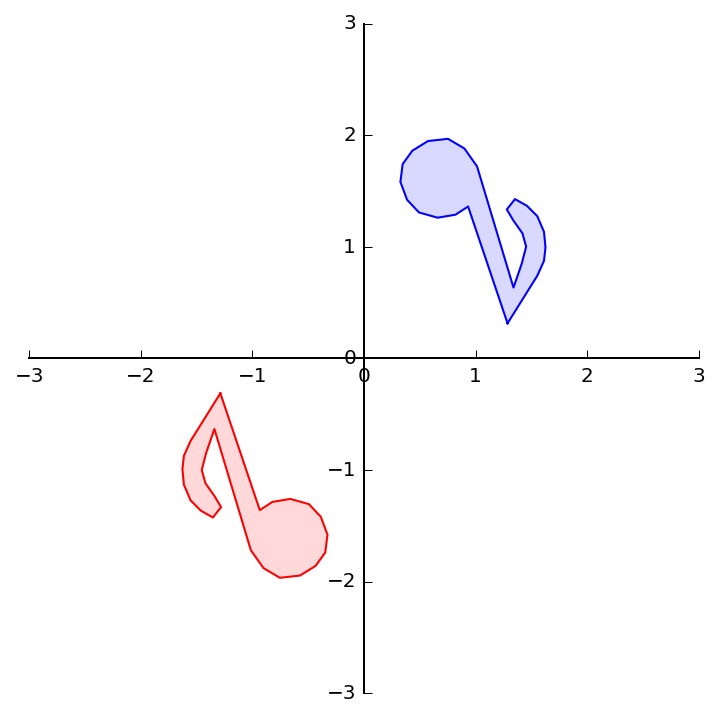

In [3]:
note = dm.mnote()
A = np.array(
    [[-1, 0],
     [ 0,-1]])
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')
Latex(r'Reflection through the origin')

We determined that the matrix $C = \left[\begin{array}{rr}-1&0\\0&-1\end{array}\right]$ implements this linear transformation.   

But notice that we could have accomplished this another way:

* First reflect through the $x_1$ axis 
* Then reflect through the $x_2$ axis

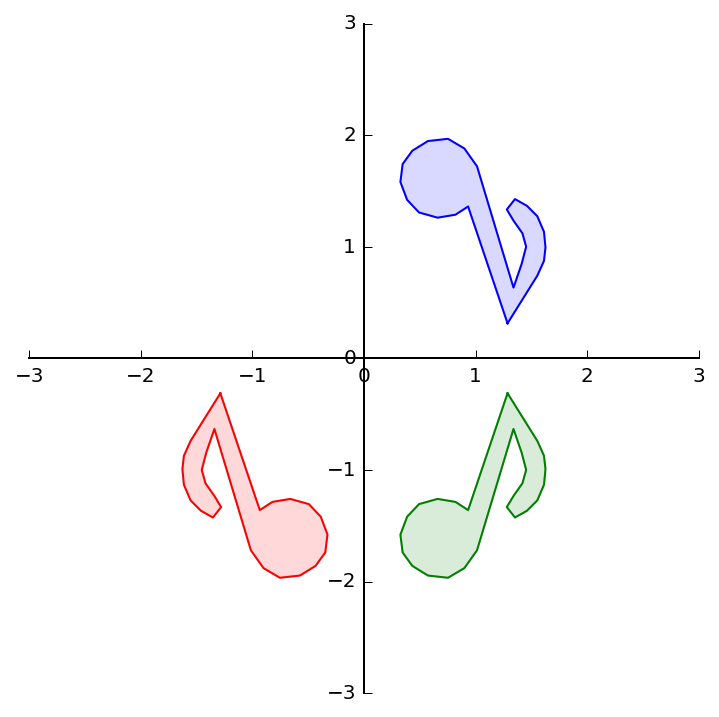

In [4]:
A = np.array(
    [[ 1, 0],
     [ 0,-1]])
B = np.array(
    [[-1, 0],
     [ 0, 1]])
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'g')
dm.plotShape(B.dot(A.dot(note)),'r')

As we saw, to reflect a point through the $x_1$ axis, we multiply it by matrix $A = \left[\begin{array}{rr}1&0\\0&-1\end{array}\right]$.

Likewise, to reflect a point through the $x_2$ axis, we multiply it by matrix $B = \left[\begin{array}{rr}-1&0\\0&1\end{array}\right]$.

So, another way to reflect point ${\bf u}$ through the origin would be:

* ${\bf v} = A{\bf u}$
* Followed by ${\bf w} = B{\bf v}.$

In other words, ${\bf w} = B(A{\bf u}).$

But it is clear that $B(A{\bf x})$ and $C{\bf x}$ are the _same_ linear transformation.  So, using $C$ we can go directly to the solution using one multiplication, rather than having to multiply twice (once for $A$ and once for $B$).

So a natural question is: given $A$ and $B$, could we find $C$ directly?

In other words, for any $A$ and $B$, could we find $C$ such that:

$$ A(B{\bf x}) = C{\bf x}? $$

Let's determine how to find $C$ given $A$ and $B.$

If $A$ is $m \times n$, $B$ is $n \times p$, and ${\bf x} \in \mathbb{R}^p,$ denote the columns of $B$ by ${\bf b_1},\dots,{\bf b_p},$ and the entries in ${\bf x}$ by $x_1, \dots, x_p.$

Then:
$$ B{\bf x} = x_1{\bf b_1} + \dots + x_p {\bf b_p}. $$

and:

$$A(B{\bf x}) = A(x_1{\bf b_1} + \dots + x_p {\bf b_p})$$

Since matrix-vector multiplication is a linear transformation:

$$ = x_1A{\bf b_1} + \dots + x_pA{\bf b_p}. $$

So the vector $A(B{\bf x})$ is a linear combination of the vectors $A{\bf b_1}, \dots, A{\bf b_p},$ using the entries in ${\bf x}$ as weights.

A linear combination of vectors is the same as a matrix-vector multiplication.   In matrix terms, this linear combination is written:

$$ A(B{\bf x}) = [A{\bf b_1} \; \dots \; A{\bf b_p}] {\bf x}.$$

So this matrix is what we are looking for!

__Definition.__  If $A$ is an $m \times n$ matrix and $B$ is $n \times p$ matrix with columns ${\bf b_1},\dots,{\bf b_p},$ then the product $AB$ is defined as the $m \times p$ matrix whose columns are $A{\bf b_1}, \dots, A{\bf b_p}.$  That is,

$$ AB = A[{\bf b_1} \; \dots \; {\bf b_p}] = [A{\bf b_1} \; \dots \; A{\bf b_p}]. $$

This definition means that for any $A$ and $B$ for which $AB$ is defined, then if $C$ = $AB$,

$$ C{\bf x} = A(B{\bf x}). $$

That is: _multiplication of matrices_ corresponds to _composition of linear transformations._

Note that when $C = AB$, $C{\bf x}$ is a vector _in the span of the columns of $A.$_ 

__Example.__  Compute $AB$ where $A = \left[\begin{array}{rr}2&3\\1&-5\end{array}\right]$ and $B = \left[\begin{array}{rrr}4&3&6\\1&-2&3\end{array}\right].$

__Solution.__ Write $B = \left[{\bf b_1}\;{\bf b_2}\;{\bf b_3}\right],$ and compute:

$$ A{\bf b_1} = \left[\begin{array}{rr}2&3\\1&-5\end{array}\right]\left[\begin{array}{r}4\\1\end{array}\right],\;\;\;
A{\bf b_2} = \left[\begin{array}{rr}2&3\\1&-5\end{array}\right]\left[\begin{array}{r}3\\-2\end{array}\right],\;\;\;
A{\bf b_3} = \left[\begin{array}{rr}2&3\\1&-5\end{array}\right]\left[\begin{array}{r}6\\3\end{array}\right],$$

$$ = \left[\begin{array}{r}11\\-1\end{array}\right]\;\;\;\left[\begin{array}{r}0\\13\end{array}\right]\;\;\;\left[\begin{array}{r}21\\-9\end{array}\right].$$

So:

$$ AB = \left[A{\bf b_1}\;A{\bf b_2}\;A{\bf b_3}\right] = \left[\begin{array}{rrr}11&0&21\\-1&13&-9\end{array}\right].$$

__Example.__ Verify that reflection through the $x_1$ axis followed by reflection through the $x_2$ axis is the same as reflection through the origin.

$$\left[\begin{array}{rr}-1&0\\0&1\end{array}\right]\left[\begin{array}{rr}1&0\\0&-1\end{array}\right] = \left[\begin{array}{rr}~&~\\~&~\end{array}\right].$$

$$\left[\begin{array}{rr}-1&0\\0&1\end{array}\right]\left[\begin{array}{rr}1&0\\0&-1\end{array}\right] = \left[\begin{array}{rr}-1&0\\0&-1\end{array}\right].$$

Note that this is a valid proof because every linear transformation of vectors is defined by its standard matrix.

__Example.__  If $A$ is a $3 \times 5$ matrix, and $B$ is a $5 \times 2$ matrix, what are the sizes of $AB$ and $BA$, if they are defined?

$$\begin{array}{cccc}A&B&=&AB\\
3\times 5&5 \times 2&& 3 \times 2\\
\left[\begin{array}{rrrrr}*&*&*&*&*\\ *&*&*&*&*\\ *&*&*&*&*\end{array}\right] & 
\left[\begin{array}{rr}*&*\\ *&*\\ *&*\\ *&*\\ *&*\end{array}\right] & 
= &
\left[\begin{array}{rr}*&*\\ *&*\\ *&*\end{array}\right]
\end{array}$$

What about $BA$?

It is not defined, because the number of columns of $B$ does not match the number of rows of $A$.

__Facts.__

If $A$ is $m\times n$, and $B$ is $p \times q$, then $AB$ is defined if and only if $n = p$.   If $AB$ is defined, then it is $m \times q$.

$$\begin{array}{cccc}A&B&=&AB\\
3\times \fbox{5}&\fbox{5} \times 2&& 3 \times 2\\
\end{array}$$

## Inner Product View of Matrix Multiplication.

Recall that the inner product of two vectors or sequences ${\bf u}$ and ${\bf v}$ is $\sum_k u_k v_k.$   

Also recall that one way to define the matrix vector product is $(A{\bf x})_i =$ inner product of ${\bf x}$ and row $i$ of $A$.

This immediately shows another way to think of matrix multiplication:

$(AB)_{ij} =$ inner product of row $i$ of $A$ and column $j$ of $B = \sum_k A_{ik}B_{kj}.$

__Example.__ Start with the same matrices as the last example, $A = \left[\begin{array}{rr}2&3\\1&-5\end{array}\right]$ and $B = \left[\begin{array}{rrr}4&3&6\\1&-2&3\end{array}\right].$  Compute the entry in row 1 and column 3 of $C$.

$$AB = \left[\begin{array}{rr}\fbox{2} & \fbox{3}\\1&-5\end{array}\right]\left[\begin{array}{rrr}4&3&\fbox{6}\\1&-2&\fbox{3}\end{array}\right] = \left[\begin{array}{rrc}*&*&2(6)+3(3)\\*&*&*\end{array}\right] = \left[\begin{array}{rrr}*&*&21\\*&*&*\end{array}\right].$$

This agrees with the result of the last example, and we could reproduce the whole solution by repeating this for each element of the result matrix.

## Question Time! Q9.1

## Matrix Algebra

We've defined multiplication of two matrices.   What about addition of two matrices?

This is straightfoward: if $A$ and $B$ are the same shape, we get $A + B$ by adding the corresponding elements.  (Just like adding vectors.)

That is, 

$$(A + B)_{ij} = A_{ij} + B_{ij}.$$

If $A$ and $B$ are not the same shape, $A + B$ is undefined.

Furthermore, we define scalar-matrix multiplication just as for vectors:

$$ (rA)_{ij} = r(A_{ij}).$$

So, just as we did for vectors, we can show that the standard properties of addition apply, and that scalar multiplication distributes over addition:

1. $A +  B = B + A$
2. $(A + B) + C = A + (B + C)$
3. $A + 0 = A$
4. $r(A + B) = rA + rB$
5. $(r + s)A = rA + sA$
6. $r(sA) = (rs)A$

Furthermore, we find that __some__ of the familiar properties of multiplication apply to matrix multiplication (assume that all sums and products are defined):

1. $A(BC) = (AB)C$  
    * multiplication of matrices is associative
2. $A(B+C) = AB + AC$ 
    * multiplication on the left distributes over addition
3. $(B+C)A = BA + CA$ 
    * multiplication on the right distributes over addition
4. $r(AB) = (rA)B = A(rB)$ 
    * for any scalar $r$
5. $I A = A = AI$ 

Note that property 1 means that we can write $ABC$ without bothering about parentheses. 

__Now, here is where things get different!__

* In general, $AB$ is __not__ equal to $BA$.  Multiplication is __not commutative!__
    * Consider $A = \left[\begin{array}{rr}1 & 1\\1&1\end{array}\right]$ and $B = \left[\begin{array}{rr}1 & 1\\1&2\end{array}\right].$

* In fact, even if $AB$ is defined, $BA$ may not be defined.
    * $AB$ and $BA$ are both defined only if $A$ and $B$ are square.

* On the other hand, sometimes $A$ and $B$ __do__ commute.
    * Consider $A$ and $B$ as the reflections through the $x_1$ and $x_2$ axis. Then $AB$ and $BA$ both implement reflection through the origin (i.e., the same transformation.) So in this case $AB = BA$.

* You cannot, in general, cancel out matrices in a multiplication.   That is, if $AC = AB$, it does not follow that $C = B$.  
    * Consider the case where $A$ is the projection onto one of the axes.

* If $AB$ is the zero matrix, you cannot in general conclude that either $A$ or $B$ must be a zero matrix.
    * Consider $A = \left[\begin{array}{rr}1 & 0\\0&0\end{array}\right]$ and $B = \left[\begin{array}{rr}0 & 0\\0&1\end{array}\right].$

__Study and remember these rules.  You will use them!__

## Powers of a Matrix

Equipped now with matrix-matrix multiplication, we can define the powers of a matrix in a straightforward way.  For an integer $k > 0$:

$$ A^k = \overbrace{A\cdots A}^k.$$

Obviously, $A$ must be a square matrix for $A^k$ to be defined.

What should $A^0$ be?

$A^0{\bf x}$ should be the result of multiplying ${\bf x}$ with $A$ zero times.   So we define $A^0 = I$.

## Question Time! Q9.2

## The Transpose of a Matrix

Given an $m \times n$ matrix $A,$ the _transpose_ of $A$ is the matrix we get by interchanging its rows and columns.

It is denoted $A^T$.   Its shape is $n \times m$.

For example, if:

$$
\begin{array}{ccc}
A = \left[\begin{array}{rr}a&b\\c&d\end{array}\right],&
B = \left[\begin{array}{rr}-5&2\\1&-3\\0&4\end{array}\right],&
C = \left[\begin{array}{rrrr}1&1&1&1\\-3&5&-2&7\end{array}\right]
\end{array}
$$

Then:

$$
\begin{array}{ccc}
A^T = \left[\begin{array}{rr}a&c\\b&d\end{array}\right],&
B^T = \left[\begin{array}{rrr}-5&1&0\\2&-3&4\end{array}\right],&
C^T = \left[\begin{array}{rr}1&-3\\1&5\\1&-2\\1&7\end{array}\right]
\end{array}
$$

The definition can be stated succinctly:

$$A^T_{ij} = A_{ji}.$$

__Rules for Transposes:__

1. $(A^T)^T = A$
2. $(A + B)^T = A^T + B^T$
3. For any scalar $r$, $(rA)^T = r(A^T)$
4. $(AB)^T = B^TA^T$

The first three are pretty obvious.  

The last one is a bit different. __Memorize it.__ You will use it: the transpose of a product is the product of the transposes __in reverse order__.

## Question Time!  Q9.3

__Question:__ For a vector in ${\bf x} \in \mathbb{R}^n$, what is ${\bf x}^T$?   

__Answer:__ For the purposes of the definition, we treat ${\bf x}$ as a $n \times 1$ matrix.  So its transpose is an $1\times n$ matrix, i.e., a matrix with a single row.

__Note:__ In Python/NumPy, a vector has only one dimension so there is no difference between a row vector or a column vector.

__Question:__ For two vectors ${\bf x}$ and ${\bf y}$, what is ${\bf x}^T {\bf y}$?

__Answer:__ By the definition of matrix-vector multiplication,  ${\bf x}^T {\bf y} = \sum_{i=1}^n x_i y_i.$

That is, ${\bf x}^T {\bf y}$ is the __inner product__ of ${\bf x}$ and ${\bf y}$.  This simple construction is a very useful one to remember.

## The Computational Viewpoint

In Python/numpy, we saw some example using:

    C = A.dot(B)
    
interpreted same as:

    for i in range(k):
        C[:,i] = AxIP(A, B[:,i]) 
        
So now you know: `A.dot(B)` is really _matrix multiplication_ of `A` and `B.` :)

New in Python 3.5 is the @ operator for matrix multiplication:

    C = A @ B


Matrix multiplication is a mainstay of computing.  Thousands of applications rely heavily on matrix multiplication.  Some examples include

* Computer graphics and animation
* Google's algorithm for ranking search results
* Modeling mechanical structures such as aircraft and buildings
* Compressing and decompressing audio signals
* Weather modeling and prediction
* Modeling quantum computing

So minimizing the time required to do matrix multiplication is immensely important.

__Complexity.__

What is the computational complexity of matrix multiplication?

For two $n \times n$ matrices, consider the definition that uses inner product:

$$ (AB)_{ij} = \sum_{k=1}^n A_{ik}B_{kj}.$$

So each element of the product $AB$ requires $n$ multiplications and $n$ additions.

There are $n^2$ elements of $AB$, so the overall computation requires $$2n \cdot n^2 = 2n^3$$ operations.

That's not particularly good news; for two matrices of size 10,000 $\times$ 10,000 (which is not particularly large in practice), this is 2 trillion operations (2 teraflops).

What is the complexity of matrix-vector multiplication?

We know that matrix-vector multiplication requires $n$ inner products of size $n$.  So, it is $2n^2.$

So what is the most efficient way to compute $A^2{\bf x}$?

1. First compute $A^2$, then compute $A^2{\bf x}$: $2n^3 + 2n^2.$
2. First compute $A{\bf x}$, then compute $A(A{\bf x}) = 2 \cdot 2n^2 = 4n^2.$

__Parallelization.__

Although matrix multiplication is computationally demanding, it has a wonderful property: it is _highly parallel_.  That is, the computation needed for each element does not require computing the other elements.  

(This is not true, for example, for Gaussian elimination; think about the role of a pivot.)

This means that if we have multiple processors, and each has access to $A$ and $B$, the work can be divided up very cleanly.

For example, let's say you have $n$ processors.   Then each processor can independently compute one column of the result, without needing to know anything about what the other processors are doing.  

Specifically, processor $i$ can compute its column as $A{\bf b_i}$.  

In that case, since all processors are working in parallel, the elapsed time is reduced to $2n^2.$

Even better, say you have $n^2$ processors.  Then each processor can compute a single element of the result, 
$(AB)_{ij}$ as $\sum_{k=1}^n A_{ik}B_{kj}$.  Then the elapsed time is reduced to $2n$.  

This sort of strategy is used for huge computations like web search and weather modeling.

__Memory and Cache Performance.__

If you take CS350 - Fundamentals of Computing Systems, you may study memory and cache performance in more detail. 

Data stored in arrays and matricies are stored in __row-major order__.  When you do sequential read/writes in row-major order, cache hits will reduce the number of memory read/writes needed in your computation.



Matrix multiplication and matrix transpose need to access elements _down columns_. For large matricies, the naive approach will end up with many unnecessary __cache misses__.  

You can look into _cache optimized_ versions of these operations, but for the purposes of this class we don't need to worry about cache performance.


__Libraries.__

The importance of matrix multiplication in practice means that very efficient and carefully constructed libraries have been developed for it.

An important issue for high performance is how the matrices are actually laid out in memory, and the order in which matrix elements are accessed.  

The premier library is called LAPACK. LAPACK has been developed over the past 40 years and is updated frequently to tune it for new computer hardware.  

Python's "numpy" uses LAPACK under the hood for its matrix computations.

Hence, even though Python is an interpreted language, for doing intensive matrix computations it is very fast, just as fast as compiled code.